In [1]:
#ElhamMirzaei
#First Dataset
#LR - DTR - SVR - NN
#With Preprocessing
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from scikeras.wrappers import KerasRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from math import sqrt
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn import tree
from torchsummary import summary
from keras_sequential_ascii import keras2ascii
cdf= pd.read_csv("HousePrice1.csv")

In [2]:
x = cdf.drop('PriceMC', axis=1)  # ویژگی‌ها
y = cdf['PriceMC']  # متغیر هدف

# تعریف Imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# جایگزین کردن مقادیر NaN با میانگین ستون
x_imputed = imputer.fit_transform(x)

# تعریف مدل
model = RandomForestRegressor()

# آموزش مدل با داده‌های imputed
model.fit(x_imputed, y)

# چاپ اهمیت ویژگی‌ها
print(model.feature_importances_)

[1.47683416e-04 5.21196813e-05 1.80350512e-07 2.68279264e-07
 1.18899665e-05 5.52042504e-05 4.96222423e-01 5.03510231e-01]


In [3]:
#Remove the null values (houses without Address)
df = cdf.dropna()
#remove outliers of Area(less than 25 & more than 200)
df.loc[:, 'Area'] = pd.to_numeric(df['Area'], errors='coerce')
df.loc[:, 'Area'] = df.loc[:, 'Area'].apply(lambda x: x if (x >= 25 and x <= 200) else np.nan)
df = df.dropna(subset=['Area'])

In [4]:
df=df.dropna().reset_index(drop=True)
df=df[['Area','Room','Parking','Warehouse','Elevator','Address','PriceMC']]

In [5]:
percentile25 = df['PriceMC'].quantile(0.25)
percentile75 = df['PriceMC'].quantile(0.75)
area25=df['Area'].quantile(0.25)
area75=df['Area'].quantile(0.75)
iqr=percentile75 -percentile25
iqrArea=area75 -area25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
upper_limit_area = area75 + 1.5 * iqrArea
lower_limit_area = area25 - 1.5 * iqrArea
new_df =df[df['PriceMC'] < upper_limit]
new_df=new_df[new_df['PriceMC'] > lower_limit]
percentile25 = new_df['PriceMC'].quantile(0.25)
percentile75 = new_df['PriceMC'].quantile(0.75)
area25=new_df['Area'].quantile(0.25)
area75=new_df['Area'].quantile(0.75)
iqr=percentile75 -percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
newdf =new_df[new_df['PriceMC'] < upper_limit]
newdf=newdf[newdf['PriceMC'] > lower_limit]
area25=new_df['Area'].quantile(0.25)
area75=new_df['Area'].quantile(0.75)
iqrArea=area75 -area25
newdf
upper_limit_area = area75 + 1.5 * iqrArea
lower_limit_area = area25 - 1.5 * iqrArea
newdf =new_df[new_df['Area'] < upper_limit_area]
newdf = newdf[newdf['Area'] > lower_limit_area]

In [6]:
x=newdf.drop('PriceMC',axis=1)
y=newdf['PriceMC']

In [7]:
xtrain,xtest,ytrain,ytest = train_test_split( x , y , test_size=20)

In [8]:
correlations = df.corr()['PriceMC'].sort_values(ascending=False)
print(correlations)

PriceMC      1.000000
Area         0.700093
Room         0.510426
Parking      0.269831
Elevator     0.246489
Warehouse    0.160367
Address     -0.472020
Name: PriceMC, dtype: float64


In [9]:
correlations = df.corr()['PriceMC']
correlations = correlations.drop(['Address', 'PriceMC'])
correlations = correlations[correlations > 0]
total_correlation = correlations.sum()
weights = correlations / total_correlation
print(weights)

Area         0.370968
Room         0.270466
Parking      0.142979
Warehouse    0.084976
Elevator     0.130611
Name: PriceMC, dtype: float64


In [10]:
x['Area'] *= 0.370968
x['Room'] *= 0.270466
x['Parking'] *= 0.142979
x['Warehouse'] *= 0.084976
x['Elevator'] *= 0.130611

In [11]:
# رگرسیون خطی
liModel = LinearRegression()
liModel .fit(xtrain , ytrain)

LinearRegression()

In [12]:
# درخت تصمیم
treeModel=DecisionTreeRegressor().fit(xtrain,ytrain)

In [13]:
# بردار پشتیبان
svmModel=SVR(kernel='rbf',C=1e3,gamma=0.1)
svmModel.fit(xtrain,ytrain)

SVR(C=1000.0, gamma=0.1)

In [14]:
def user_input():
    room = int(input("Enter the number of rooms (1/2/3): "))
    address = int(input("Enter the address (between 1 and 22): "))
    area = int(input("Enter the area (between 25 and 200): "))
    elevator = input("Is there an elevator? (yes/no): ") == 'yes'
    warehouse = input("Is there a warehouse? (yes/no): ") == 'yes'
    parking = input("Is there a parking? (yes/no): ") == 'yes'
    d = {
        'Area': [area],
        'Room': [room],
        'Parking': [parking],
        'Warehouse': [warehouse],
        'Elevator': [elevator],
        'Address': [address]
    }
    # Creating a DataFrame
    forPridict = pd.DataFrame(d)
    return forPridict

In [15]:
forPridict = user_input()
forPridict = np.asarray(forPridict).astype('float32')

predictByLiModel = liModel.predict(forPridict)
print("Prediction by Linear Regression: ", predictByLiModel)

predictByTreeModel = treeModel.predict(forPridict)
print("Prediction by Decision Tree: ", predictByTreeModel)

predictBySvmModel = svmModel.predict(forPridict)
print("Prediction by Support Vector Regression: ", predictBySvmModel)

Prediction by Linear Regression:  [9748.07072603]
Prediction by Decision Tree:  [8731.42857143]
Prediction by Support Vector Regression:  [7891.9562699]


Prediction by Support Vector Regression:  [7891.9562699]


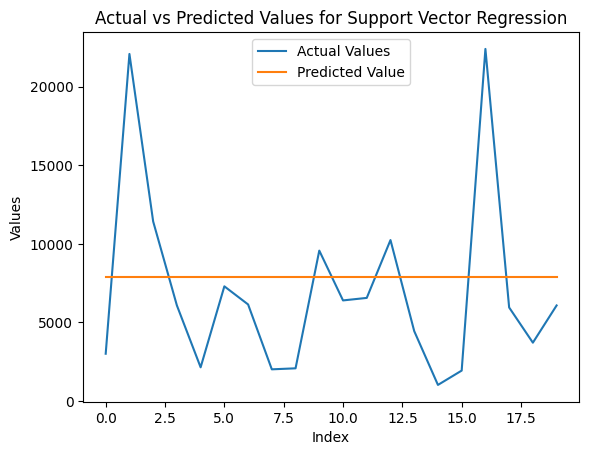

In [16]:
# پیش‌بینی با مدل
predictBySvmModel = svmModel.predict(forPridict)
# چاپ پیش‌بینی
print("Prediction by Support Vector Regression: ", predictBySvmModel)
# رسم نمودار خطی
plt.plot(np.arange(len(ytest)), ytest, label='Actual Values')
plt.plot(np.arange(len(ytest)), [predictBySvmModel]*len(ytest), label='Predicted Value')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values for Support Vector Regression')
plt.legend()
plt.show()

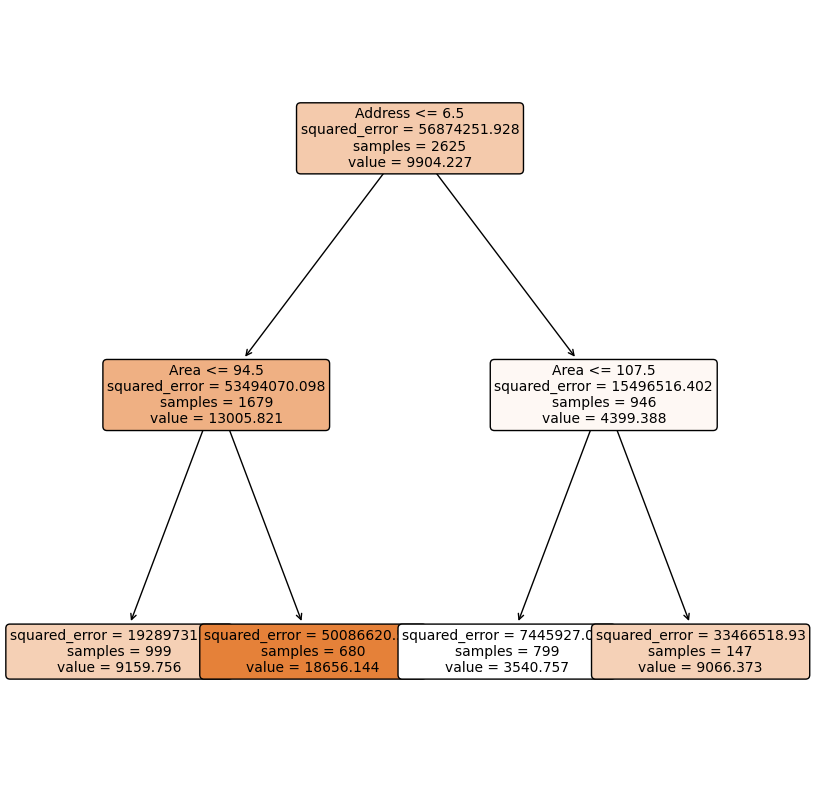

In [17]:
treeModel = DecisionTreeRegressor(max_depth=2).fit(xtrain, ytrain)
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(treeModel, 
               feature_names = ['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address'],
               class_names = ['PriceMC'],
               filled = True, 
               rounded = True, 
               fontsize=10,
               ax=ax)
plt.show()

In [18]:
models = [liModel, treeModel, svmModel]
model_names = ["Linear Regression", "Decision Tree", "Support Vector Regression"]

# ایجاد دیکشنری برای ذخیره مقادیر R2 Score
r2_scores = {name: [] for name in model_names}
mse_scores = {name: [] for name in model_names}
rmse_scores = {name: [] for name in model_names}
mae_scores = {name: [] for name in model_names}

for _ in range(200):
    for i, model in enumerate(models):
        prediction = model.predict(xtest)

        # محاسبه و ذخیره R2 Score
        r2 = r2_score(ytest, prediction)
        r2_scores[model_names[i]].append(r2)

        mse = mean_squared_error(ytest, prediction)
        mse_scores[model_names[i]].append(mse)

        rmse = sqrt(mse)
        rmse_scores[model_names[i]].append(rmse)

        mae = mean_absolute_error(ytest, prediction)
        mae_scores[model_names[i]].append(mae)

# محاسبه میانگین دقت و خطاها
for name in model_names:
    print(f"\n{name}:")
    print("Average R2 Score: ", sum(r2_scores[name]) / len(r2_scores[name]))
    print("Average Mean Squared Error (MSE): ", sum(mse_scores[name]) / len(mse_scores[name]))
    print("Average Root Mean Squared Error (RMSE): ", sum(rmse_scores[name]) / len(rmse_scores[name]))
    print("Average Mean Absolute Error (MAE): ", sum(mae_scores[name]) / len(mae_scores[name]))

# ایجاد یک آرایه برای ذخیره میانگین دقت
R2_result = [np.mean(r2_scores[name]) for name in model_names]


Linear Regression:
Average R2 Score:  0.6102125132295811
Average Mean Squared Error (MSE):  13108976.271018934
Average Root Mean Squared Error (RMSE):  3620.63202645875
Average Mean Absolute Error (MAE):  3006.8932285914675

Decision Tree:
Average R2 Score:  0.7921979745530074
Average Mean Squared Error (MSE):  6988607.672412787
Average Root Mean Squared Error (RMSE):  2643.5974868373582
Average Mean Absolute Error (MAE):  2302.317751457507

Support Vector Regression:
Average R2 Score:  0.7064870305123927
Average Mean Squared Error (MSE):  9871159.754585745
Average Root Mean Squared Error (RMSE):  3141.840186035213
Average Mean Absolute Error (MAE):  1881.2191400969182


In [19]:
# شبکه عصبی
# نرمال‌سازی داده‌ها
min_max_scaler = MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)

# تعریف مدل
model = nn.Sequential(
    nn.Linear(6, 100),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(100, 50),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(50, 1)
)

# تعریف بهینه‌ساز و تابع خطا
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

# ایجاد دیکشنری برای ذخیره مقادیر R2 Score و خطاها
r2_scores = []
mse_scores = []
rmse_scores = []
mae_scores = []

In [20]:
for _ in range(200):
    # تقسیم داده‌ها به داده‌های آموزش و آزمون
    xtrain, xtest, ytrain, ytest = train_test_split(x_scale, y, test_size=0.2)

    # تبدیل داده‌ها به tensorهای PyTorch
    xtrain = torch.tensor(xtrain, dtype=torch.float32)
    ytrain = torch.tensor(ytrain.values, dtype=torch.float32).view(-1, 1)
    xtest = torch.tensor(xtest, dtype=torch.float32)
    ytest = torch.tensor(ytest.values, dtype=torch.float32).view(-1, 1)

    # آموزش مدل
    for epoch in range(500):
        pred = model(xtrain)
        loss = loss_fn(pred, ytrain)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    # پیش‌بینی با مدل
    with torch.no_grad():
        pred = model(xtest)
        ytest_np = ytest.numpy()
        pred_np = pred.numpy()

        r2_result = r2_score(ytest_np, pred_np)
        r2_scores.append(r2_result)

        mse = mean_squared_error(ytest_np, pred_np)
        mse_scores.append(mse)

        rmse = sqrt(mse)
        rmse_scores.append(rmse)

        mae = mean_absolute_error(ytest_np, pred_np)
        mae_scores.append(mae)

# محاسبه میانگین دقت و خطاها
print("Average R2 Score: ", sum(r2_scores) / len(r2_scores))
print("Average Mean Squared Error (MSE): ", sum(mse_scores) / len(mse_scores))
print("Average Root Mean Squared Error (RMSE): ", sum(rmse_scores) / len(rmse_scores))
print("Average Mean Absolute Error (MAE): ", sum(mae_scores) / len(mae_scores))

# اضافه کردن میانگین دقت الگوریتم PyTorch به آرایه R2_result
R2_result.append(np.mean(r2_scores))

Average R2 Score:  0.7015059374225934
Average Mean Squared Error (MSE):  16913147.74
Average Root Mean Squared Error (RMSE):  4105.221424498709
Average Mean Absolute Error (MAE):  2657.865402832031


In [21]:
# تعریف مدل
model = nn.Sequential(
    nn.Linear(6, 100),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(100, 50),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(50, 1)
)
# چاپ خلاصه مدل
summary(model, input_size=(1, 6))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 100]             700
              ReLU-2               [-1, 1, 100]               0
           Dropout-3               [-1, 1, 100]               0
            Linear-4                [-1, 1, 50]           5,050
              ReLU-5                [-1, 1, 50]               0
           Dropout-6                [-1, 1, 50]               0
            Linear-7                 [-1, 1, 1]              51
Total params: 5,801
Trainable params: 5,801
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.02
Estimated Total Size (MB): 0.03
----------------------------------------------------------------


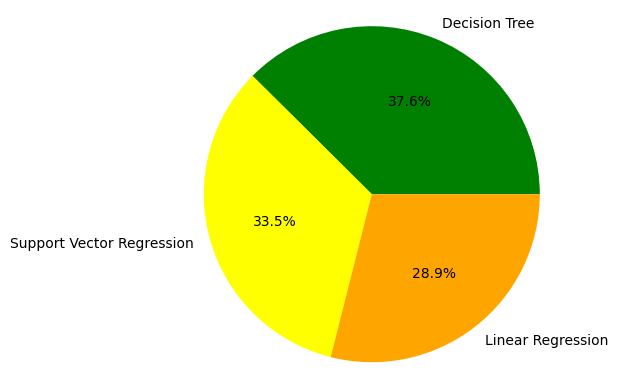

In [22]:
accuracy_dict = dict(zip(model_names, R2_result))
# مرتب‌سازی دیکشنری بر اساس میانگین دقت
sorted_accuracy = sorted(accuracy_dict.items(), key=lambda item: item[1], reverse=True)
sorted_model_names = [item[0] for item in sorted_accuracy]
sorted_R2_result = [item[1] for item in sorted_accuracy]
colors = ['green', 'yellow', 'orange', 'red']
fig, ax = plt.subplots()
ax.pie(sorted_R2_result, labels=sorted_model_names, autopct='%1.1f%%', colors=colors)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()